In [1]:
from __future__ import print_function
from tensorflow import keras
import keras,sklearn
import tensorflow as tf
import numpy as np
seed=0
np.random.seed(seed)
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
x=np.loadtxt('DATA/data-for-DNN-1.dat')
y=np.loadtxt('DATA/labels-for-DNN-1.dat')

# Plot Dataset

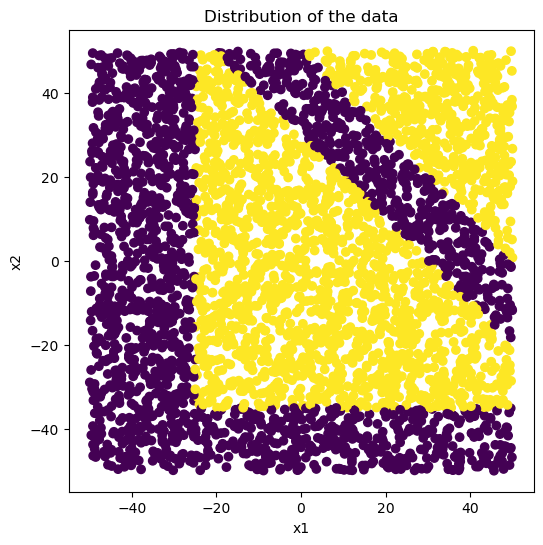

In [3]:
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y,marker='o')
plt.title('Distribution of the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop, Nadam
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

# Defeine Size of the training set

In [5]:
Per_train = 0.8
N = len(x)
L = len(x[0])
N_train = int(Per_train*N)
print("Number of samples in dataset:",N)
print("Number of samples in train data:",N_train)

Number of samples in dataset: 4000
Number of samples in train data: 3200


# Spliting Training and Validation data

In [6]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


# Model Creation

In [7]:
def created_model(optimizer= Adam(),activation='relu',dropout_rate=0.2):
    
    model = Sequential() 
    model.add(Dense(L, input_shape=(L,), activation=activation))
    model.add(Dense(20, activation=activation))  
    model.add(Dense(20, activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, activation='sigmoid'))
    
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# Best Optimizer

In [8]:
batch_size = 64

model_gridsearch = KerasClassifier(build_fn=created_model, 
                        epochs=60, 
                        batch_size=batch_size, 
                        verbose=False)
`
optimizer = ['SGD', 'RMSprop', 'Adagrad','Adam', 'Adamax', 'Nadam']

param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
best_optimizer = grid_result.best_params_['optimizer']

SyntaxError: invalid syntax (2168785851.py, line 7)

# Best Batch Size

In [18]:
model_gridsearch = KerasClassifier(build_fn=created_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=False)


batch_size = [32, 64, 128]


param_grid = dict(batch_size=batch_size)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

#results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
best_batch_size = grid_result.best_params_['batch_size']

NameError: name 'batch_size' is not defined

# Droupout Value

In [19]:
batch_size = 64
model_gridsearch = KerasClassifier(build_fn=created_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=False)


dropout_rate = [0.1, 0.2, 0.3, 0.4]

param_grid = dict(dropout_rate=dropout_rate)


grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train)

#results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_dropout_rate = grid_result.best_params_['dropout_rate']

C:\Users\Utente\AppData\Local\Temp\ipykernel_17328\328381057.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=created_model,


Best: 0.785937 using {'dropout_rate': 0.3}
0.779375 (0.066277) with: {'dropout_rate': 0.1}
0.704375 (0.058232) with: {'dropout_rate': 0.2}
0.785937 (0.031615) with: {'dropout_rate': 0.3}
0.764375 (0.086234) with: {'dropout_rate': 0.4}


# Best Activation Function

In [20]:
batch_size = 64
model_gridsearch = KerasClassifier(build_fn=created_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=False)


activation = ['softmax', 'softsign', 'relu', 'tanh', 'sigmoid', 'linear']

param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=2, cv=4)
grid_result = grid.fit(x_train,y_train)

# results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_activation = grid_result.best_params_['activation']

C:\Users\Utente\AppData\Local\Temp\ipykernel_17328\3770447610.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=created_model,


Best: 0.804688 using {'activation': 'relu'}
0.657188 (0.092392) with: {'activation': 'softmax'}
0.698438 (0.043932) with: {'activation': 'softsign'}
0.804688 (0.062876) with: {'activation': 'relu'}
0.691563 (0.046832) with: {'activation': 'tanh'}
0.683438 (0.031079) with: {'activation': 'sigmoid'}
0.670000 (0.012870) with: {'activation': 'linear'}


# Model with best Parameters

In [21]:
best_model = Sequential() 

activation = best_activation
best_model.add(Dense(L, input_shape=(L,), activation=activation))
best_model.add(Dense(20, activation=activation))  
best_model.add(Dense(20, activation=activation))

dropout_rate = best_dropout_rate
best_model.add(Dropout(dropout_rate))
best_model.add(Dense(1, activation='sigmoid'))

optimizer = best_optimizer

best_model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

batch_size = best_batch_size
epochs = 300
#Fitting again with more data
fit = best_model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid), verbose=False)

NameError: name 'best_optimizer' is not defined

In [ ]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# accuracy in training and validation
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['Train', 'Validation'])

# loss in training and validation
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Validation'])

plt.show()